# Grid World Visualization--Part I
Consider a grid world modeled using a 2D numpy array of dimension of $10\times 10$. There are 10 robots moving in the field. Write a function, named `display_grid` that takes the current locations of all robots as inputs, and displays the locations of all robots. Use appropriate plot to display the locations, and clearly label your plot. Read the documentation of `xlim` and `ylim`, and use them to make sure that the whole grid can be displayed in your plot.

An example of robot locations, i.e., input to the function, is given below:

```py
 location = np.array([[9 8],
                    [8 7],
                    [9 3],
                    [4 3],
                    [3 1],
                    [3 2],
                    [2 7],
                    [4 4],
                    [0 0],
                    [5 4]])
```
Each row of the input array corresponds to an agent. The first column represents the row indices of all agents, and the second column represents the column indices of all agents in the field. An exmaple output is given below:
![Example output](assets/robot_location.png)

Help on function display_grid in module __main__:

display_grid(locations: numpy.ndarray, title='Robot Locations in a 10×10 Grid World')
    Display robot positions on a 10×10 grid.
    
    Parameters:
        locations : np.ndarray
            A 2D numpy array of shape (N, 2).
            Each row = [row, col] of a robot.



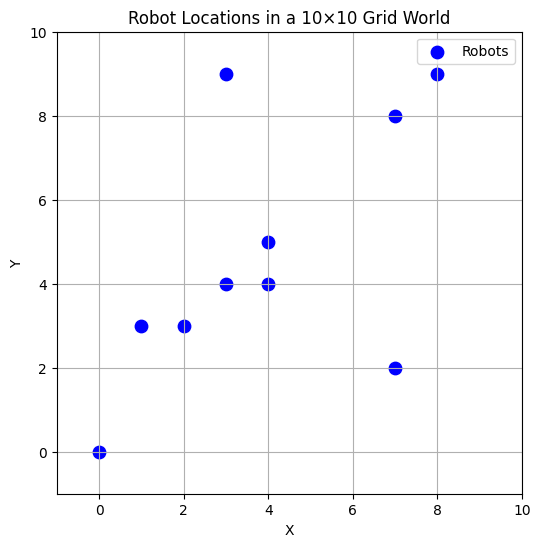

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def display_grid(locations: np.ndarray, title="Robot Locations in a 10×10 Grid World"):
    """
    Display robot positions on a 10×10 grid.

    Parameters:
        locations : np.ndarray
            A 2D numpy array of shape (N, 2).
            Each row = [row, col] of a robot.
    """
    x = locations[:, 1]
    y = locations[:, 0]

    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, c='blue', s=80, label="Robots")

    plt.xlim(-1, 10)
    plt.ylim(-1, 10)

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

help(display_grid)

locations = np.array([
    [9, 8],
    [8, 7],
    [9, 3],
    [4, 3],
    [3, 1],
    [3, 2],
    [2, 7],
    [4, 4],
    [0, 0],
    [5, 4]
])

display_grid(locations)

# Grid World Visualization--Part II
Each robot can take one out of four actions: ["up", "down", "left", "right"], indicating the direction towards which the robot will move. If the moving direction will make the robot go outside the boundary of the grid world, then the robot will remain at its current location.

Write a function named `update_location` that takes the current location and action of a robot as inputs, and return its updated location. Feel free to verify your code by plotting the locations of robot before and after taking actions.

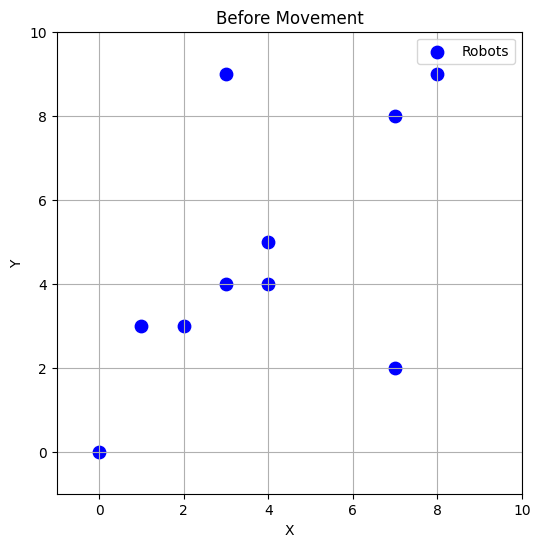

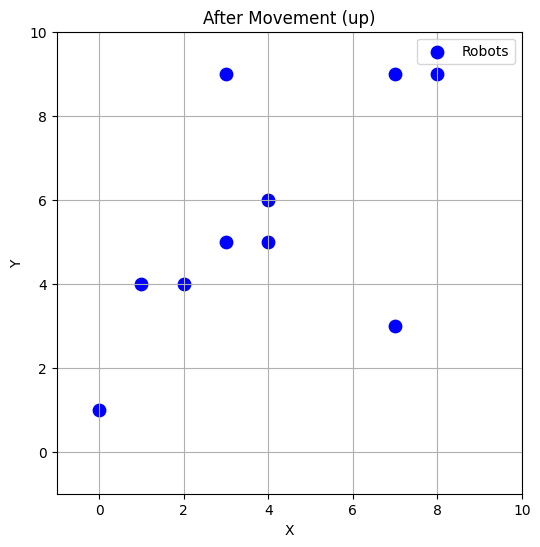

In [22]:
def update_location(location: np.ndarray, action: str) -> np.ndarray:
    """
    Update a robot's location based on an action in a 10×10 grid world.

    Parameters:
        location : np.ndarray
            A 1D array [row, col] representing the robot’s current location.
        action : str
            One of ["up", "down", "left", "right"] indicating the movement direction.

    Returns:
        np.ndarray
            A new 1D array [new_row, new_col] representing the updated location.
            If the movement would leave the grid (0–9 range), the robot stays in place.
    """
    row, col = location

    if action == "up":
        if row < 9:
            row += 1

    elif action == "down":
        if row > 0:
            row -= 1

    elif action == "left":
        if col > 0:
            col -= 1

    elif action == "right":
        if col < 9:
            col += 1

    return np.array([row, col])

locations = np.array([
    [9, 8],
    [8, 7],
    [9, 3],
    [4, 3],
    [3, 1],
    [3, 2],
    [2, 7],
    [4, 4],
    [0, 0],
    [5, 4]
])

action = "up"
updated_locations = np.array([update_location(loc, action) for loc in locations])

display_grid(locations, title="Before Movement")
display_grid(updated_locations, title=f"After Movement ({action})")

# Infectious Disease Visualization
Revise your function "simulate_disease" from previous assignment to achieve the following goals. The function should print out the statistic information of the infection probability at the end of prediction horizon, including minimum, maximum, average, and standard deviation.

The function should also plot how the infection probabilities of all individuals evolve over the prediction horizon. Pick appropriate visualization plot and clearly label your plot. You do not need to generate legends for the plot. 


Help on function simulate_disease in module __main__:

simulate_disease(initial_prob: numpy.ndarray, connection_matrix: numpy.ndarray, time_steps: int) -> numpy.ndarray
    Simulate disease spread using x^(k+1) = W * x^k and visualize infection evolution.
    
    Parameters:
        initial_prob : np.ndarray
            1D numpy array of initial infection probabilities.
        connection_matrix : np.ndarray
            2D row-stochastic numpy array representing network connections.
        time_steps : int
            Number of simulation steps.
    
    Returns:
        np.ndarray
            1D numpy array of infection probabilities after the final step.

Infection Statistics After Simulation:
Minimum probability: 0.6034011189813416
Maximum probability: 0.6034011211273971
Average probability: 0.6034011199207483
Standard deviation: 7.622306076624382e-10


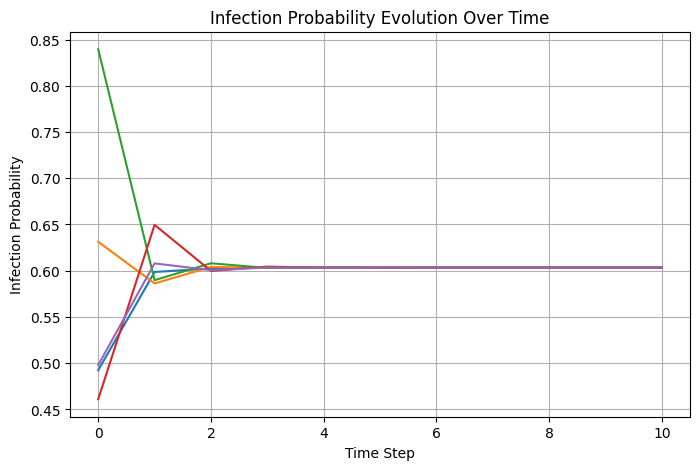

Final infection probabilities: [0.60340112 0.60340112 0.60340112 0.60340112 0.60340112]


In [58]:
def simulate_disease(initial_prob: np.ndarray, connection_matrix: np.ndarray, time_steps: int) -> np.ndarray:
    """
    Simulate disease spread using x^(k+1) = W * x^k and visualize infection evolution.

    Parameters:
        initial_prob : np.ndarray
            1D numpy array of initial infection probabilities.
        connection_matrix : np.ndarray
            2D row-stochastic numpy array representing network connections.
        time_steps : int
            Number of simulation steps.

    Returns:
        np.ndarray
            1D numpy array of infection probabilities after the final step.
    """
    x = initial_prob.copy()
    history = [x]

    for _ in range(time_steps):
        x = np.dot(connection_matrix, x)
        history.append(x)

    history = np.array(history)
    
    print("Infection Statistics After Simulation:")
    print("Minimum probability:", np.min(x))
    print("Maximum probability:", np.max(x))
    print("Average probability:", np.mean(x))
    print("Standard deviation:", np.std(x))

    plt.figure(figsize=(8, 5))
    for i in range(history.shape[1]):
        plt.plot(history[:, i])

    plt.xlabel("Time Step")
    plt.ylabel("Infection Probability")
    plt.title("Infection Probability Evolution Over Time")
    plt.grid(True)
    plt.show()

    return x

help(simulate_disease)

N = 5
time_steps = 10
np.random.seed(20)

matrix = np.random.rand(N, N)
symmetric_matrix = (matrix + matrix.T) / 2
connection_matrix = symmetric_matrix / symmetric_matrix.sum(axis=1, keepdims=True)

initial_prob = np.random.rand(N)

final_p = simulate_disease(initial_prob, connection_matrix, time_steps)

print("Final infection probabilities:", final_p)

# Image Downsampling
Write a function named `downsample_image`. The function takes a grayscale image and an integer downsampling rate as input and outputs a filtered version of the image. The input image is represented by a 2D numpy array. You can assume the image is of a square shape, and the image size is larger than downsampling rate. To downsample the image, we follow the steps below:
- Partition the image into a collection of smaller blocks. Each block is of dimension $k\times k$, where $k$ is the downsampling rate. If the original image is of dimension $N\times N$, then the rows and columns are partitions into $\frac{N}{k}$ segments, respectively. The output image should then be of dimension $\frac{N}{k}\times \frac{N}{k}$.
- For each block associated with $i$-th row segment, and $j$-th column segment, calculate the average of all pixels within the block, and the average is $(i,j)$-th pixel in output image is assigned as the average. 


Your function should display the downsampled image. An example of the downsampling process is given below:
![downsample process](assets/filter.gif)

The red block in this example is sometimes referred to as a kernel. The kernel in this example is known as a moving average filter. 

Please use this image to test your function. Although this is a colorful image, you can convert it to grayscale using the code below and then pass it to the function:

```py
from PIL import Image
img = Image.open('sample_image_2.jpg').convert('L') # load image in gray scale
img_array = np.array(img) # 8-bit code grayscale
```
See an example of downsampled image with downsampling rate=5:

![downsampled image](assets/dsimg.png)


Revise your function to downsample a colorful image. Note that a colorful image can be represented as a 3D numpy array, where the 3rd dimension represents the RGB channels.

Help on function downsample_image in module __main__:

downsample_image(img: numpy.ndarray, k: int) -> numpy.ndarray
    Downsample a grayscale image using a k×k moving average filter.
    
    Parameters:
        img : np.ndarray
            2D numpy array representing a square grayscale image.
        k : int
            Downsampling rate. The image is partitioned into k×k blocks.
    
    Returns:
        np.ndarray
            2D numpy array representing the downsampled image,
            of size (N/k) × (N/k).



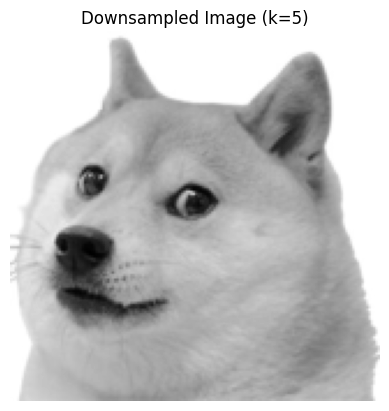

In [59]:
def downsample_image(img: np.ndarray, k: int) -> np.ndarray:
    """
    Downsample a grayscale image using a k×k moving average filter.

    Parameters:
        img : np.ndarray
            2D numpy array representing a square grayscale image.
        k : int
            Downsampling rate. The image is partitioned into k×k blocks.

    Returns:
        np.ndarray
            2D numpy array representing the downsampled image,
            of size (N/k) × (N/k).
    """
    N = img.shape[0]
    new_size = N // k

    downsampled = np.zeros((new_size, new_size))

    for i in range(new_size):
        for j in range(new_size):
            block = img[i*k:(i+1)*k, j*k:(j+1)*k]
            downsampled[i, j] = np.mean(block)

    plt.imshow(downsampled, cmap='gray')
    plt.title(f"Downsampled Image (k={k})")
    plt.axis('off')
    plt.show()

    return downsampled

help(downsample_image)

from PIL import Image
img = Image.open('assets/sample_image_2.jpg').convert('L')
img_array = np.array(img)

downsampled = downsample_image(img_array, k=5)

**Extra challenge** (this challenge is not graded): This challenge will test your code efficiency. You need to improve your code to achieve runtime . Please use the following code to test your efficiency:


In [ ]:
timeit -n 1 -r 7 img_ds2 = downsample_image(image=img_array, downsampling_rate=5)

Help on function downsample_image_fast in module __main__:

downsample_image_fast(img: numpy.ndarray, k: int) -> numpy.ndarray
    Fast downsampling of a grayscale image using vectorized reshaping using runtime O(N²) and avoids Python loops.
    
    Parameters:
        img : np.ndarray
            2D grayscale image (N×N).
        k : int
            Downsampling rate.
    
    Returns:
        np.ndarray
            Downsampled grayscale image of size (N/k, N/k).



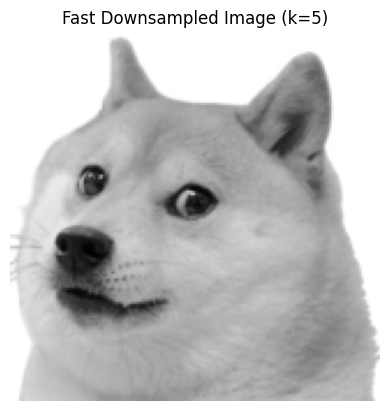

0.0476822080090642


In [60]:
def downsample_image_fast(img: np.ndarray, k: int) -> np.ndarray:
    """
    Fast downsampling of a grayscale image using vectorized reshaping using runtime O(N²) and avoids Python loops.

    Parameters:
        img : np.ndarray
            2D grayscale image (N×N).
        k : int
            Downsampling rate.

    Returns:
        np.ndarray
            Downsampled grayscale image of size (N/k, N/k).
    """
    N = img.shape[0]
    new_size = N // k

    img_blocks = img.reshape(new_size, k, new_size, k)

    downsampled = img_blocks.mean(axis=(1, 3))

    plt.imshow(downsampled, cmap='gray')
    plt.title(f"Fast Downsampled Image (k={k})")
    plt.axis('off')
    plt.show()

    return downsampled

help(downsample_image_fast)

import timeit

runtime = timeit.timeit(
    stmt="downsample_image_fast(img_array, 5)",
    setup="from __main__ import downsample_image_fast, img_array",
    number=1
)

print(runtime)

# Word Embedding
LLMs represent words as high dimensional vectors (also known as embeddings). You’ll explore how simple embeddings can capture semantic meanings. Example embeddings of a limited vocabulary are provided below.
- Can you propose a metric to measure the similarity between a pair of words? **Hint**: You have seen a measure in previous assignments.
- Choose an appropriate visualization to show which words are most similar to each other.
- What word do you obtain for `king – man + woman` using vector arithmetic? Does this result make sense to you? Why or why not.

Help on function cosine_similarity in module __main__:

cosine_similarity(vector_a: numpy.ndarray, vector_b: numpy.ndarray) -> float
    Calculate the cosine similarity between two numpy arrays.
    
    Parameters:
        vector_a : np.ndarray
            The first numpy array.
        vector_b : np.ndarray
            The second numpy array.
    
    Returns:
        float
            The cosine similarity between vector_a and vector_b.

Help on function word_similarity in module __main__:

word_similarity(word1: str, word2: str, embedding_dict: dict) -> float
    Compute cosine similarity between two words using their embeddings.
    
    Parameters:
        word1 : str
            The first word.
        word2 : str
            The second word.
        embedding_dict : dict
            Dictionary mapping words to embedding lists.
    
    Returns:
        float
            Cosine similarity between the embedding vectors of the two words.

Help on function plot_similarity_heatmap i

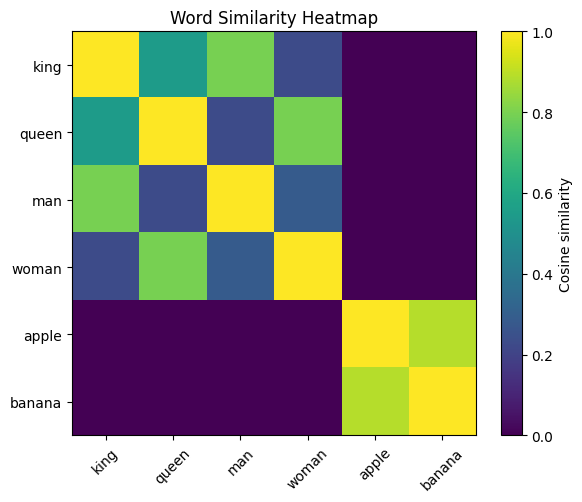

In [61]:
embeddings = {
    "king": [
        1.0, 1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0
    ] + [0.0]*40,
    "queen": [
        1.0, -1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0
    ] + [0.0]*40,
    "man": [
        0.0, 1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0
    ] + [0.0]*40,
    "woman": [
        0.0, -1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0
    ] + [0.0]*40,
    "apple": [
        0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.7, 0.2, 0.6, 0.2
    ] + [0.0]*40,
    "banana": [
        0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.6, 0.8, 0.6, 0.7
    ] + [0.0]*40
}


def cosine_similarity(vector_a: np.ndarray, vector_b: np.ndarray) -> float:
    """
    Calculate the cosine similarity between two numpy arrays.

    Parameters:
        vector_a : np.ndarray
            The first numpy array.
        vector_b : np.ndarray
            The second numpy array.

    Returns:
        float
            The cosine similarity between vector_a and vector_b.
    """
    dot_product = np.dot(vector_a, vector_b)
    norm_a = np.sqrt(np.sum(vector_a ** 2))
    norm_b = np.sqrt(np.sum(vector_b ** 2))
    similarity = dot_product / (norm_a * norm_b)
    return similarity

help(cosine_similarity)

def word_similarity(word1: str, word2: str, embedding_dict: dict) -> float:
    """
    Compute cosine similarity between two words using their embeddings.

    Parameters:
        word1 : str
            The first word.
        word2 : str
            The second word.
        embedding_dict : dict
            Dictionary mapping words to embedding lists.

    Returns:
        float
            Cosine similarity between the embedding vectors of the two words.
    """
    v1 = np.array(embedding_dict[word1])
    v2 = np.array(embedding_dict[word2])
    return cosine_similarity(v1, v2)

help(word_similarity)

def plot_similarity_heatmap(embedding_dict: dict) -> None:
    """
    Plot a heatmap showing pairwise cosine similarities between all words.

    Parameters:
        embedding_dict : dict
            Dictionary mapping words to embedding lists.

    Returns:
        None
    """
    words = list(embedding_dict.keys())
    n = len(words)

    sim_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            v1 = np.array(embedding_dict[words[i]])
            v2 = np.array(embedding_dict[words[j]])
            sim_matrix[i, j] = cosine_similarity(v1, v2)

    plt.figure(figsize=(6, 5))
    plt.imshow(sim_matrix, cmap="viridis")
    plt.colorbar(label="Cosine similarity")
    plt.xticks(range(n), words, rotation=45)
    plt.yticks(range(n), words)
    plt.title("Word Similarity Heatmap")
    plt.tight_layout()
    plt.show()

help(plot_similarity_heatmap)

print("sim(king, queen)  =", word_similarity("king", "queen", embeddings))
print("sim(king, man)    =", word_similarity("king", "man", embeddings))
print("sim(apple, banana)=", word_similarity("apple", "banana", embeddings))

plot_similarity_heatmap(embeddings)